# Introduction
In this exercise, a statistical analysis will be done on a dataset of bookreviews. This will be done by doing the following:
- Performing a descriptive analysis of numerical features (mean, variance, median)
- Distribution of the average_rating
- Plotting a correlation matrix of the features and drawing conclusions

In [65]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [66]:
# Read the dataset
df = pd.read_csv('books.csv', error_bad_lines=False, parse_dates = ['publication_date'])

df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors = 'coerce')
df = df.dropna()
df.info()

C:\Users\ardejong\Anaconda3\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn13              11121 non-null  int64         
 6   language_code       11121 non-null  object        
 7   num_pages           11121 non-null  int64         
 8   ratings_count       11121 non-null  int64         
 9   text_reviews_count  11121 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11121 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.1+ MB


# Perform descriptive analysis of numerical features (mean, variance, median)
In this chapter, a descriptive analysis will be performed of the numerical features of the dataset. In order to get the best out of this analysis, we're going to include/exclude some features from the dataset.
- Include: publication_date. it's possible to convert the datetime into a numerical feature. We'll do this by creating another column that gets the delta timestamp with now.
- Exclude: bookID, isbn, isbn13. Altough they're originally numerical features, they're randomly generated and not really applicable for mathmatical functions.

In [67]:
# Create publication_timestamp column
now = dt.datetime.now()
df['age_in_seconds'] = abs(df.publication_date.sub(now)).dt.total_seconds()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11121 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11121 non-null  int64         
 1   title               11121 non-null  object        
 2   authors             11121 non-null  object        
 3   average_rating      11121 non-null  float64       
 4   isbn                11121 non-null  object        
 5   isbn13              11121 non-null  int64         
 6   language_code       11121 non-null  object        
 7   num_pages           11121 non-null  int64         
 8   ratings_count       11121 non-null  int64         
 9   text_reviews_count  11121 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11121 non-null  object        
 12  age_in_seconds      11121 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), ob

In [69]:
# Perform descriptive analysis
# Columns to use
cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'age_in_seconds']

# Use a for loop to print out the statistics
# The statistics will be calculated manually instead of using the numpy packages 
# so that people can see that I understand the statistical functions
for i in cols:
    # Set up the variables to print out 
    mean = np.round(sum(df[i]) / df.shape[0], 2)
    differences = df[i] - mean
    diff_sq = np.round(differences ** 2, 2)
    var = np.round(sum(diff_sq) / len(diff_sq), 2)
    std = np.round(var ** (1/2), 2)
    
    # Perform descriptive analysis
    print(f"{i}:")
    print(f"The mean of the column {i} is {mean}")
    print(f"The variance of the column {i} is {var}")
    print(f"The standard deviation of the column {i} is {std}\n")

average_rating:
The mean of the column average_rating is 3.93
The variance of the column average_rating is 0.12
The standard deviation of the column average_rating is 0.35

num_pages:
The mean of the column num_pages is 336.34
The variance of the column num_pages is 58138.44
The standard deviation of the column num_pages is 241.12

ratings_count:
The mean of the column ratings_count is 17945.12
The variance of the column ratings_count is 12657163820.34
The standard deviation of the column ratings_count is 112504.06

text_reviews_count:
The mean of the column text_reviews_count is 542.12
The variance of the column text_reviews_count is 6639533.76
The standard deviation of the column text_reviews_count is 2576.73

age_in_seconds:
The mean of the column age_in_seconds is 683647040.81
The variance of the column age_in_seconds is 6.792584782015389e+16
The standard deviation of the column age_in_seconds is 260625877.11



# Distribution of the average_rating
In this chapter, the average rating column of the dataset will be shown as a distribution. After that, the distribution function will be chosen for this column and justified why.

## Visualization distribution average rating

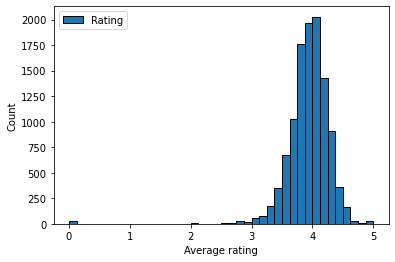

In [70]:
fig, ax = plt.subplots()

ax.hist(df['average_rating'], edgecolor = 'black', bins = 40, label = 'Rating')
ax.set(xlabel = "Average rating", ylabel = "Count")
plt.legend()
plt.show()

## Findings
Based on the plot, we can conclude that the average rating column has a normal distribution. It's a normal distribution because of the following reasons.
- The bulk of the observations generated from a normal distribution lie near the mean. The mean of the average_rating is 3.93.
- Just like the plot above, a normal distribution has the shape of a symmetric bell curve.
- In order to further prove it's a normal distribution, we'll draw a normal distribution plot from random generated numbers. We'll also draw the ECDF plot for it.

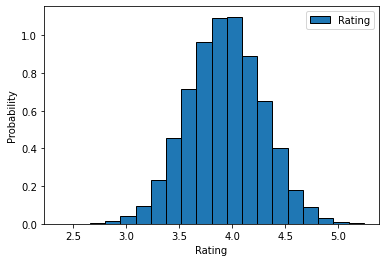

In [71]:
samples_normal = np.random.normal(df['average_rating'].mean(), df['average_rating'].std(), 10000)

# Generate histogram
plt.hist(samples_normal, density = True, bins = 20, edgecolor = 'black', label = 'Rating')

# Label axes
plt.xlabel("Rating")
plt.ylabel("Probability")

# Show the plot
plt.legend()
plt.show()

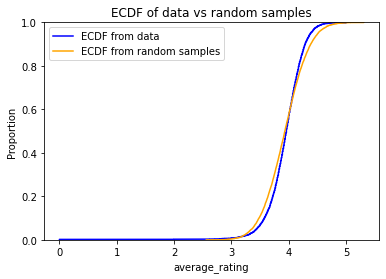

In [72]:
# Making ECDF plot 
fig, ax = plt.subplots()

sns.ecdfplot(data=df,x='average_rating', color = 'blue')
sns.ecdfplot(data=samples, color = 'orange')
plt.legend(labels=["ECDF from data","ECDF from random samples"])
plt.title("ECDF of data vs random samples")
plt.show()

You'll see that a normal distribution of random generated numbers, based on the mean and standard deviation of the data is pretty similar. This applies also for the ECDF plots

# Correlation matrix
In this chapter, a correlation matrix will be shown. After that, conclusion from the matrix will be drawn.
Just like with the descriptive analysis, we'll exlude the columns bookID, isbn, isbn13.

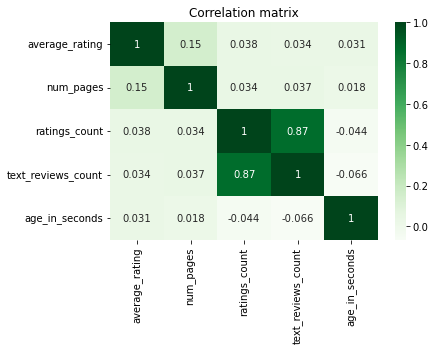

In [73]:
cols = ['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count', 'age_in_seconds']
data = df[cols]

cor = data.corr()

# Display the correlation matrix
sns.heatmap(cor, annot=True, cmap = 'Greens')
plt.title("Correlation matrix")
plt.show()

## Conclusions correlation matrix
Based on the matrix, we can conclude the following:
- Ratings_count and text_reviews_count are heavily linear correlated. It makes sense, since they're both text reviews
- Num_pages and average review are slightly positively linear correlated
- The other features have a relative small linear correlation with each other. This may indicate that the features are non-linear correlated, if there's a correlation at all.